In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
db = pd.read_csv('train.csv')

In [4]:
db

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
db.shape


(42000, 785)

In [9]:
db.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
15018,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


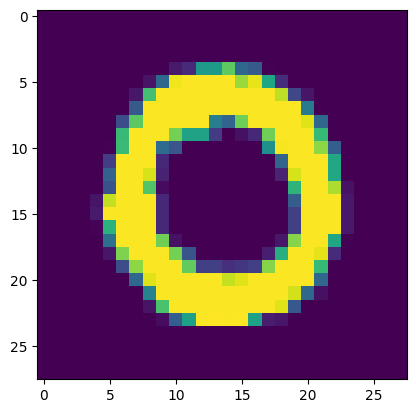

In [24]:


plt.imshow(db.iloc[1,1:].values.reshape(28,28))


In [47]:

x = db.iloc[:,1:]
y = db.iloc[:,0]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
X_test, X_test

(       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 5457        0       0       0       0       0       0       0       0       0   
 38509       0       0       0       0       0       0       0       0       0   
 25536       0       0       0       0       0       0       0       0       0   
 31803       0       0       0       0       0       0       0       0       0   
 39863       0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 8388        0       0       0       0       0       0       0       0       0   
 29359       0       0       0       0       0       0       0       0       0   
 40276       0       0       0       0       0       0       0       0       0   
 18421       0       0       0       0       0       0       0       0       0   
 4335        0       0       0       0       0       0       0       0       0   
 
        pixel9

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier()

In [52]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
import time
start = time.time()
y_Pred = knn.predict(X_test)
end = time.time()
print('Time taken:', end - start)

Time taken: 14.742699384689331


In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_Pred)

0.9648809523809524

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
X_train, X_test,X_train.shape, X_test.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (33600, 784),
 (8400, 784))

In [80]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [81]:
X_train_tr = pca.fit_transform(X_train)
X_test_tr = pca.transform(X_test)

In [82]:
X_train.shape, X_test.shape,X_train_tr.shape, X_test_tr.shape

((33600, 784), (8400, 784), (33600, 100), (8400, 100))

In [83]:
knn = KNeighborsClassifier()

In [84]:
knn.fit(X_train_tr, y_train)

KNeighborsClassifier()

In [85]:
y_Pred = knn.predict(X_test_tr)

In [86]:
accuracy_score(y_test, y_Pred)

0.9533333333333334

In [88]:

for i in range(1, 3):
    pca = PCA(n_components=i)
    X_train_tr = pca.fit_transform(X_train)
    X_test_tr = pca.transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_tr, y_train)
    y_Pred = knn.predict(X_test_tr)
    print(i, accuracy_score(y_test, y_Pred))

1 0.2577380952380952
2 0.32392857142857145


In [90]:

pca = PCA(n_components=2)
X_train_tr = pca.fit_transform(X_train)
X_test_tr = pca.transform(X_test)


In [92]:
X_train_tr.shape, X_test_tr.shape

((33600, 2), (8400, 2))

In [95]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(
    x=X_train_tr[:,0], y=X_train_tr[:,1], color=y_train_trf,
    labels={'x':'PC1', 'y':'PC2'}, title='PCA'
)

In [97]:
fig.show()

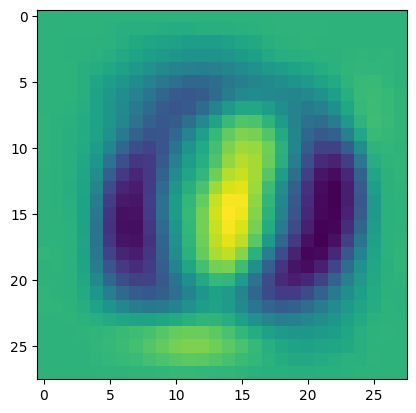

In [91]:

plt.imshow(pca.inverse_transform(X_train_tr[0]).reshape(28,28))